In [1]:
cd /Users/Nicole/desktop/python_bcb546/Python_assignment/pyhw-files

/Users/Nicole/Desktop/python_bcb546/Python_assignment/pyhw-files


In [2]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

## Part 1: 


Documented the given function

In [3]:
#Overall this code creates a dictionary of species names and sequence from a fasta file
def get_sequences_from_file(fasta_fn): # defines the function'get_sequences_from_file' for a file that is in fasta format
    sequence_data_dict = {} # creates an empty sequence directory
    for record in SeqIO.parse(fasta_fn, "fasta"): #SeqIO.parse takes a fasta file and returns a SeqRecord iterator
        description = record.description.split() # allows you to access each part of the string by holding a record in the fasta with descriptors
        species_name = description[1] + " " + description[2] # forms the species name with spaces inbetween the two parts
        sequence_data_dict[species_name] = record.seq #species name is what you can use to access the sequence
    return(sequence_data_dict) # put the output into the sequence directory

Check to see if this loop worked:

In [4]:
bears_fasta= get_sequences_from_file("bears_cytb.fasta")
print (bears_fasta)

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet()), 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()), 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA', SingleLetterAlphabet()), 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA', SingleLetterAlphabet()), 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()), 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA', SingleLetterAlphabet()), 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA', SingleLetterAlphabet()), 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA', SingleLetterAlphabet()), 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...AGA', Sin

Check to see if keys are based on Species Names:

In [5]:
bears_fasta.keys()

dict_keys(['Ursus spelaeus', 'Ursus arctos', 'Ursus thibetanus', 'Melursus ursinus', 'Ursus americanus', 'Helarctos malayanus', 'Ailuropoda melanoleuca', 'Tremarctos ornatus', 'Ursus maritimus'])

## Part 2

Created a for loop to translate a nucleotide sequence into amino acids

In [6]:
#Looked at codon table
mito_table = CodonTable.unambiguous_dna_by_name ["Vertebrate Mitochondrial"]
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [98]:
#This code takes a string of nucleotides, translates it into amino acids and does not include stop codons
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name ["Vertebrate Mitochondrial"]
    aa_seq_string = "Vertebrate Mitochondrial"
    for n in range(0,len(string_nucleotides)-3, 3): 
        codon = string_nucleotides [n:n+3]
        aa_seq_string = mito_table.forward_table[codon] + aa_seq_string
    return(aa_seq_string)

Check to see if loop works:

In [94]:
with open ('sample.txt') as myfile:
    sample=myfile.read()
print(sample)

TTTATTAATGATGGTGCTAGA


In [95]:
translate_function(sample)

'AGDNIFVertebrate Mitochondrial'

## Part 3

Created an alternative function to translate nucleotide sequences into amino acids using BioPython

In [54]:
#Importing necessary packages
from Bio.Seq import Seq 
from Bio.Alphabet import IUPAC 

In [55]:
#This alternative code also takes a string of nucleotides, translates it into amino acids and does not include stop codons
#This is a much simpler version, using Bio.python
def alternative_translate(string_nucleotides):
    coding_dna = Seq(string_nucleotides, IUPAC.ambiguous_dna) # a variable is created with the IUPAC.ambiguous alphabet
    return coding_dna.translate(table="Vertebrate Mitochondrial", to_stop=True) # The amino acid string is returned by using the .translate in BioPython, stops at a stop codon.

Check to see if this loop works:

In [96]:
alternative_translate(sample)

Seq('FINDGA', ExtendedIUPACProtein())

## Part 4

Created a function that calculates the proportion of each type of amino acid (charged, polar, or hydrophobic).

In [10]:
#This function defines the proportion of charged amino acids
charged = ['R','K','D','E']
def get_proportion_aa_charged(aa_seq, charged):
    count = 0 #sets count at 0
    for aa in aa_seq: 
        if aa in charged: #if the amino acid is in the charged set, count increased by one
            count += 1
    return count/ len(aa_seq) #returns the count over the total amino acids

In [11]:
#This function defines the proportion of polar amino acids
polar = ['Q','N','H','S','T','Y','C','M','W']
def get_proportion_aa_polar(aa_seq, polar):
    count = 0
    for aa in aa_seq:
        if aa in polar: #if the amino acid is in the polar set, count increases by one
            count += 1
    return count/ len(aa_seq) #returns the count over the total amino acids

In [12]:
#This function defines the proportion of hydrophobic amino acids
hydrophobic = ['A','I','L','F','V','P','G']
def get_proportion_aa_hydrophobic(aa_seq, hydrophobic):
    count = 0
    for aa in aa_seq:
        if aa in hydrophobic: #if the amino acid is in the hydrophobic set, cout increase by one
            count += 1
    return count/ len(aa_seq) #returns the count over the total amino acids

In [13]:
#created a sample to test the loop out on
sample_a = 'AANNNDDDD'

In [14]:
#Tested the charged function
charged_number = get_proportion_aa_charged(sample_a, charged) 
print(charged_number) 

0.4444444444444444


In [15]:
#Tested the polar function
polar_number = get_proportion_aa_polar(sample_a, polar)
print(polar_number)

0.3333333333333333


In [16]:
#Tested the hydrophobic function
hydrophobic_number = get_proportion_aa_hydrophobic(sample_a, hydrophobic)
print(hydrophobic_number)

0.2222222222222222


## Part 5

Created a combined function that both translates nucleotide sequences into amino acids and sorts them by type (polar, charged, and hydrophobic).

In [64]:
#Ran part 1 function on the given fasta file
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 

In [65]:
bear_df = pd.read_csv("bears_data.csv")
counter = 0 #set counter to zero

In [66]:
species_list = list(bear_df.species) #showed what is currently in the file
print (bear_df)

                  species     mass  charged  polar  hydrophobic
0          Ursus spelaeus  550.800      NaN    NaN          NaN
1            Ursus arctos  203.500      NaN    NaN          NaN
2        Ursus thibetanus   99.714      NaN    NaN          NaN
3        Melursus ursinus  100.030      NaN    NaN          NaN
4        Ursus americanus  110.560      NaN    NaN          NaN
5     Helarctos malayanus   47.020      NaN    NaN          NaN
6  Ailuropoda melanoleuca  118.200      NaN    NaN          NaN
7      Tremarctos ornatus  140.700      NaN    NaN          NaN
8         Ursus maritimus  425.100      NaN    NaN          NaN


In [69]:
def combined_function(x, sample_dict): #defines function that translates the file and gets the proportion of charged, polar, and hydrophobic amino acids
    translate = alternative_translate (str(sample_dict[x])) #uses the function from part 3 to read the sequence as a string
    proportion_charged = get_proportion_aa_charged(translate, charged) #translates the amino acids and calculates proportion of charged aa
    proportion_polar = get_proportion_aa_polar(translate, polar) #translates the amino acids and calculates proportion of polar aa
    proportion_hydrophobic = get_proportion_aa_hydrophobic(translate, hydrophobic) #translates amino acids and calculates the proportion of hydrophobic aa
    return proportion_charged, proportion_polar, proportion_hydrophobic #adds the columns proportion charged, proportion polar and proportion hydrophobic as output

In [70]:
bear_df[['proportion_charged', 'proportion_polar', 'proportion_hydrophobic']] = bear_df.apply(lambda row: pd.Series(combined_function(row['species'], cytb_seqs)), axis = 1)#applies the above to bear_df, creating 3 new coloums with the proportion of each type of amino acids

In [58]:
print(bear_df)

                  species     mass  charged  polar  hydrophobic  \
0          Ursus spelaeus  550.800      NaN    NaN          NaN   
1            Ursus arctos  203.500      NaN    NaN          NaN   
2        Ursus thibetanus   99.714      NaN    NaN          NaN   
3        Melursus ursinus  100.030      NaN    NaN          NaN   
4        Ursus americanus  110.560      NaN    NaN          NaN   
5     Helarctos malayanus   47.020      NaN    NaN          NaN   
6  Ailuropoda melanoleuca  118.200      NaN    NaN          NaN   
7      Tremarctos ornatus  140.700      NaN    NaN          NaN   
8         Ursus maritimus  425.100      NaN    NaN          NaN   

   proportion_charged  proportion_polar  proportion_hydrophobic  
0            0.092348          0.329815                0.577836  
1            0.092348          0.324538                0.583113  
2            0.092348          0.327177                0.580475  
3            0.089710          0.340369                0.569921  

## Part 6

Made a bar graph of the data, comparing species weight.

In [36]:
%matplotlib inline
from ggplot import * #imports ggplot to look at the data

In [59]:
print(bear_df)

                  species     mass  charged  polar  hydrophobic  \
0          Ursus spelaeus  550.800      NaN    NaN          NaN   
1            Ursus arctos  203.500      NaN    NaN          NaN   
2        Ursus thibetanus   99.714      NaN    NaN          NaN   
3        Melursus ursinus  100.030      NaN    NaN          NaN   
4        Ursus americanus  110.560      NaN    NaN          NaN   
5     Helarctos malayanus   47.020      NaN    NaN          NaN   
6  Ailuropoda melanoleuca  118.200      NaN    NaN          NaN   
7      Tremarctos ornatus  140.700      NaN    NaN          NaN   
8         Ursus maritimus  425.100      NaN    NaN          NaN   

   proportion_charged  proportion_polar  proportion_hydrophobic  
0            0.092348          0.329815                0.577836  
1            0.092348          0.324538                0.583113  
2            0.092348          0.327177                0.580475  
3            0.089710          0.340369                0.569921  

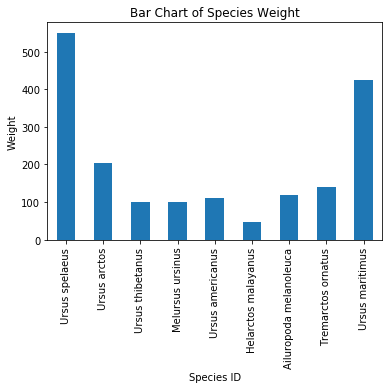

In [101]:
bear_weight = bear_df.plot(x = 'species', y = 'mass', kind='bar', legend = False, title = "Bar Chart of Species Weight")#plots a bar graph of weight on y axis, bear species on x, the bars representing mass of bear.
bear_weight.set_xlabel("Species ID") #creates a x axis label
bear_weight.set_ylabel("Weight") #creates a y axis label

Ursus spelaeus is the bear that weighs the most. It is interesting because it is known as the 'cave bear' and there were so many that in World War I the German army used them as a source of phosphates.

## Part 7

Created a graph based on how many of each type of amino acid each bear species has.

In [71]:
bear_no_mass = bear_df[['species', 'proportion_charged', 'proportion_polar', 'proportion_hydrophobic']]#shows bears data without masses of bears
print(bear_no_mass)

                  species  proportion_charged  proportion_polar  \
0          Ursus spelaeus            0.092348          0.329815   
1            Ursus arctos            0.092348          0.324538   
2        Ursus thibetanus            0.092348          0.327177   
3        Melursus ursinus            0.089710          0.340369   
4        Ursus americanus            0.089710          0.337731   
5     Helarctos malayanus            0.092348          0.340369   
6  Ailuropoda melanoleuca            0.089710          0.343008   
7      Tremarctos ornatus            0.089710          0.335092   
8         Ursus maritimus            0.092348          0.327177   

   proportion_hydrophobic  
0                0.577836  
1                0.583113  
2                0.580475  
3                0.569921  
4                0.572559  
5                0.567282  
6                0.567282  
7                0.575198  
8                0.580475  


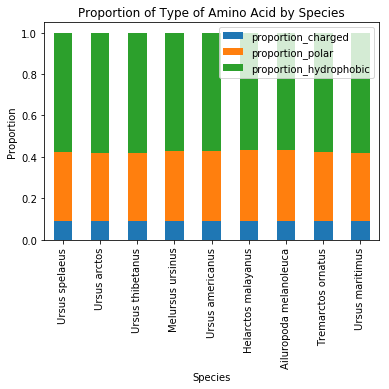

In [99]:
pandas_plot = bear_no_mass.plot(x = 'species', kind='bar',stacked=True,title="Proportion of Type of Amino Acid by Species")#creates a bar graph with the bars colored by what type of amino acid/ amount of each type the species has
pandas_plot.set_ylabel("Proportion") #labels y axis
pandas_plot.set_xlabel("Species") #lables x axis

This data shows that cytochrome_b is coposed of mainly hycrophobic regions.
It also shows that the proportions are similar throughout all of the species of bears, which suggests that cytochrom_b is conserved throughout the species. 

## Part 8

Saved the file created in the previous step as a .csv

In [63]:
#creates a new file with the data that was created in this notebook
bear_df.to_csv('bears_mass_cytb.csv', index=False)